#### Import packages

In [32]:
from datasets import load_dataset
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Code

#### Import dataset

In [3]:
dataset = load_dataset("timdettmers/openassistant-guanaco")

Repo card metadata block was not found. Setting CardData to empty.


In [94]:
train_df = pd.DataFrame(dataset['train'], columns=['text'])
test_df = pd.DataFrame(dataset['test'], columns=['text'])

In [95]:
df = pd.concat([train_df, test_df], axis=0)

In [96]:
documents = df['text'].tolist()

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
vectorizer.fit(documents)
vector_documents = vectorizer.transform(documents)

In [98]:
vocab = vectorizer.get_feature_names_out()

print(f"Length of vocabulary: {len(vocab)}")

Length of vocabulary: 25278


In [99]:
from sklearn.cluster import KMeans

# Number of clusters (languages)
k = 5

kmeans = KMeans(n_clusters=k, max_iter=100, n_init=2, verbose=True, random_state=2307)
kmeans.fit(vector_documents)
labels = kmeans.labels_

Initialization complete
Iteration 0, inertia 19066.86348156223.
Iteration 1, inertia 9777.833360920173.
Iteration 2, inertia 9727.879977278117.
Iteration 3, inertia 9714.72384395386.
Iteration 4, inertia 9708.532428565324.
Iteration 5, inertia 9705.10994454273.
Iteration 6, inertia 9703.592703383765.
Iteration 7, inertia 9702.759291833163.
Iteration 8, inertia 9702.212832366673.
Iteration 9, inertia 9701.833054432447.
Iteration 10, inertia 9701.506544784046.
Iteration 11, inertia 9701.2759424376.
Iteration 12, inertia 9701.096030889054.
Iteration 13, inertia 9700.969042104341.
Iteration 14, inertia 9700.882757062569.
Iteration 15, inertia 9700.80470524187.
Iteration 16, inertia 9700.732471772797.
Iteration 17, inertia 9700.682269408722.
Iteration 18, inertia 9700.654306258042.
Iteration 19, inertia 9700.629212633317.
Iteration 20, inertia 9700.617330322486.
Iteration 21, inertia 9700.612084593213.
Iteration 22, inertia 9700.610622983.
Converged at iteration 22: strict convergence.
Init

In [100]:
for idx in range(k):
  centroid = kmeans.cluster_centers_[idx]

  # Sort terms according to their weights 
  # (argsort goes from lowest to highest, we reverse the order through slicing)
  sorted_terms = centroid.argsort()[::-1]

  # Print out the top 10 terms for the cluster
  print("Cluster " + str(idx) + ":")
  print([vocab[j] for j in sorted_terms[:20]])

Cluster 0:
['die', 'und', 'der', 'et', 'zu', 'des', 'ist', 'est', 'les', 'ich', 'eine', 'le', 'von', 'sie', 'du', 'das', 'pour', 'une', 'ein', 'mit']
Cluster 1:
['la', 'en', 'el', 'que', 'los', 'una', 'se', 'es', 'las', 'para', 'del', 'por', 'su', 'como', 'más', 'lo', 'puede', 'al', 'son', 'ser']
Cluster 2:
['use', 'like', 'help', 'time', 'data', 'ai', 'make', 'open', 'language', 'used', 'using', 'world', 'code', 'model', 'new', 'example', 'need', 'di', 'people', 'create']
Cluster 3:
['на', 'не', 'что', 'для', 'как', 'это', 'или', 'из', 'может', 'то', 'вы', 'если', 'по', 'от', 'но', 'чтобы', 'за', 'ты', 'он', 'его']
Cluster 4:
['que', 'en', 'el', 'la', 'una', 'para', 'es', 'los', 'se', 'las', 'por', 'del', 'como', 'más', 'te', 'tu', 'si', 'lo', 'su', 'puedes']


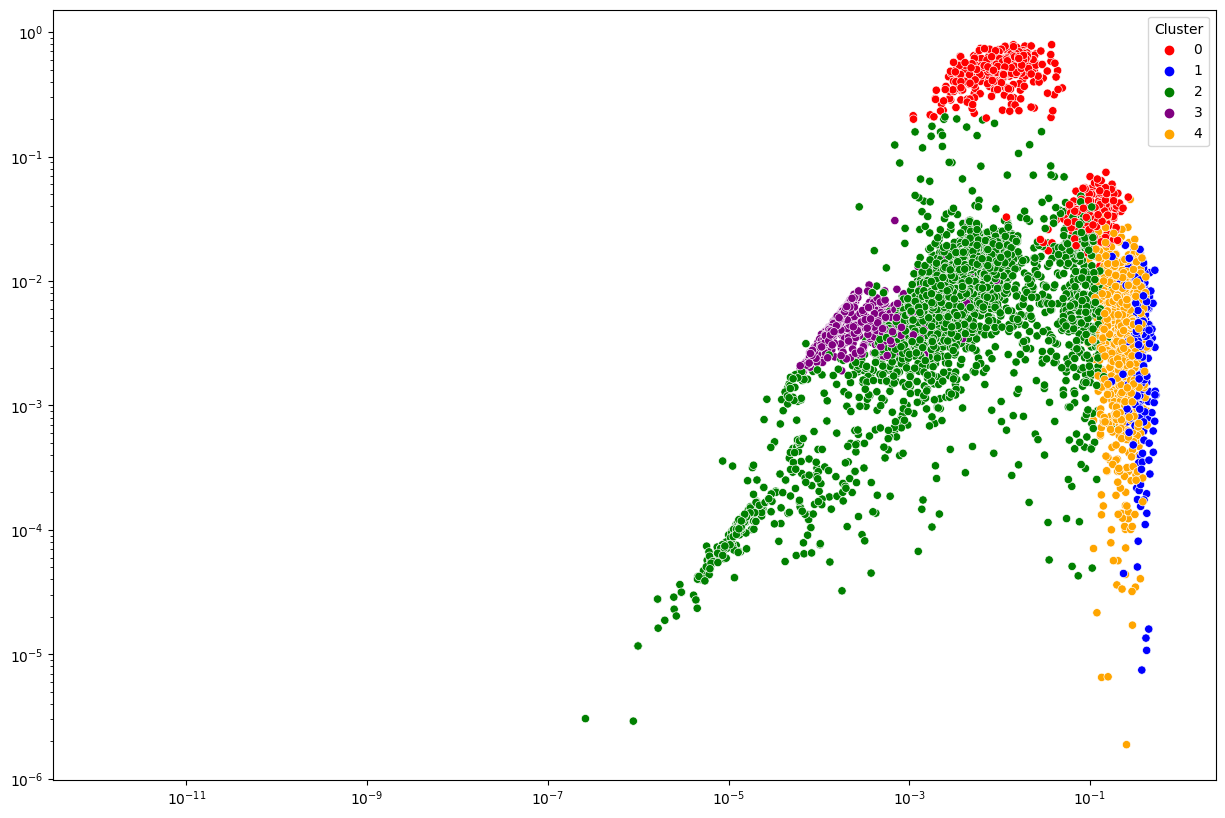

In [101]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(2)
reduced_data = svd.fit_transform(vector_documents)

[x,y] = np.transpose(reduced_data)
fig = plt.figure(figsize=(15, 10))

plt.xscale('log')
plt.yscale('log')
sns.scatterplot(x=x, y=y, hue=labels, palette=['red', 'blue', 'green', 'purple', 'orange'])
plt.legend(title="Cluster")